In [2]:
# Importing important packages for plotting
import dask.dataframe as dd
import os
import pandas as pd
import subprocess as sp
import matplotlib.pyplot as plt
import glob
from pathlib import Path

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

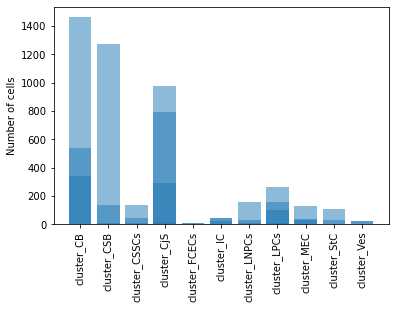

In [3]:
# setting the path to where the barcode files are
path = '/ceph/rimlsfnwi/data/moldevbio/zhou/jarts/R/20210705scRNA_integration_all/'

# generating empty dataframes for names and counts
names, counts = [], []

# appending the names of the files and the counts sequentially
for filename in os.listdir(path):
    with open('/ceph/rimlsfnwi/data/moldevbio/zhou/jarts/R/20210705scRNA_integration_all/'+ filename) as fileObj:
        if not filename == 'barcodes.csv':
            names.append(filename)
            counts.append(len(fileObj.readlines()))

# generating a dataframe from the names and counts
df = pd.DataFrame({'name': names, 'cells': counts})
df = df.sort_values(by = 'name')
df["name"] = df.name.str.replace("(_atac).*","")

# plotting the names and number of cells
plt.bar(df["name"],df["cells"], alpha=0.5)
plt.ylabel("Number of cells")
plt.xticks(rotation=90)

In [5]:
# creating pandas dataframe of counts per location
data = pd.read_csv('/ceph/rimlsfnwi/data/moldevbio/zhou/jarts/data/lako2021/merge_peaks/2021-07-07/tmp/selecter.tsv', sep='\t', header=0)
data.index = data['loc']
data2 = data.drop('loc', axis=1)
data2


,CB1,CB2,CB3,CjS1,CjS2,CjS3,CSB1,CSB2,CSB3,CSSCs1,...,LPCs3,MEC1,MEC2,MEC3,StC1,StC2,StC3,Ves1,Ves2,Ves3
loc,,,,,,,,,,,,,,,,,,,,,
chr10:100148777-100148977,124.0,151.0,81.0,231.0,128.0,72.0,1.0,141.0,33.0,17.0,...,12.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0
chr10:100371213-100371413,43.0,73.0,23.0,120.0,75.0,42.0,2.0,113.0,24.0,30.0,...,0.0,5.0,1.0,0.0,31.0,15.0,0.0,0.0,0.0,0.0
chr10:101221695-101221895,90.0,119.0,63.0,150.0,76.0,39.0,0.0,117.0,42.0,12.0,...,9.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0
chr10:101380568-101380768,61.0,102.0,43.0,158.0,86.0,38.0,2.0,113.0,20.0,9.0,...,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
chr10:101394703-101394903,54.0,77.0,40.0,81.0,45.0,20.0,2.0,84.0,14.0,4.0,...,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9:98162628-98162828,61.0,91.0,34.0,100.0,43.0,45.0,2.0,79.0,21.0,6.0,...,8.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
chr9:98162908-98163108,56.0,81.0,43.0,78.0,42.0,31.0,0.0,63.0,8.0,16.0,...,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
chr9:98808470-98808670,44.0,86.0,23.0,124.0,58.0,34.0,6.0,98.0,18.0,9.0,...,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Column mean counts')

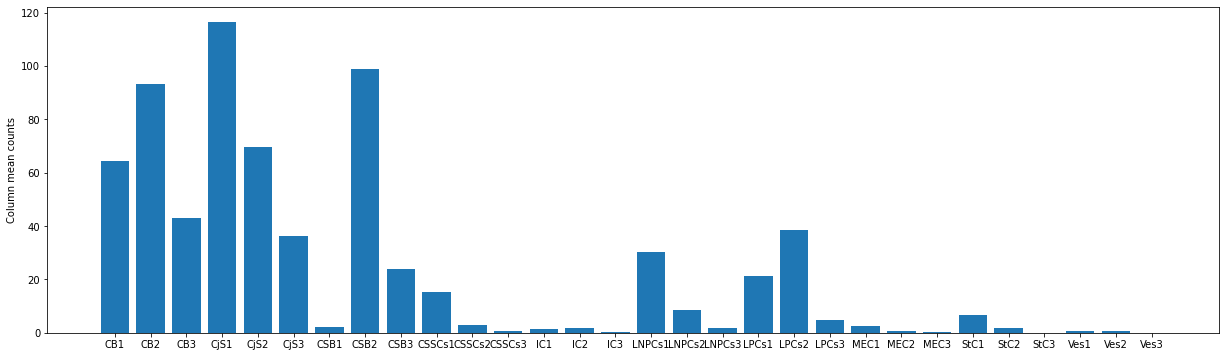

In [9]:
# barplot of all counts per significant chromosome region in replicate files
data3 = []
data4 = []
for column in data2:
    data3.append(data2[column].mean())
    data4.append(column)
data3
data4

data5 = pd.DataFrame(list(zip(data3, data4)))
data5
plt.figure(figsize=(21,6))
plt.bar(data5[1],data5[0])
plt.ylabel("Column mean counts")

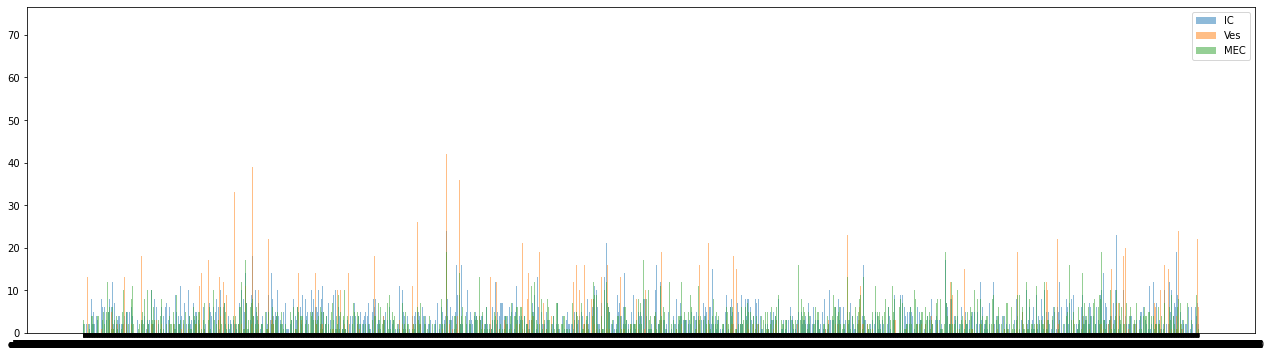

In [156]:
# Calulating the sum of replicates for sparce cells (in number of cells and number of counts)
sum_column = data["IC1"] + data["IC2"] + data["IC3"]
data["IC"] = sum_column

sum_column2 = data["Ves1"] + data["Ves2"] + data["Ves3"]
data["Ves"] = sum_column2

sum_column3 = data["MEC1"] + data["MEC2"] + data["MEC3"]
data["MEC"] = sum_column3

# barplots for all genomic locations (not that informative) and not normalized for number of cells
# plt.figure(figsize=(22,6))
# plt.bar(data["loc"],data["IC"], alpha=0.5, label="IC")
# plt.bar(data["loc"],data["Ves"], alpha=0.5, label="Ves")
# plt.bar(data["loc"],data["MEC"], alpha=0.5, label="MEC")
# plt.legend(loc='upper right')

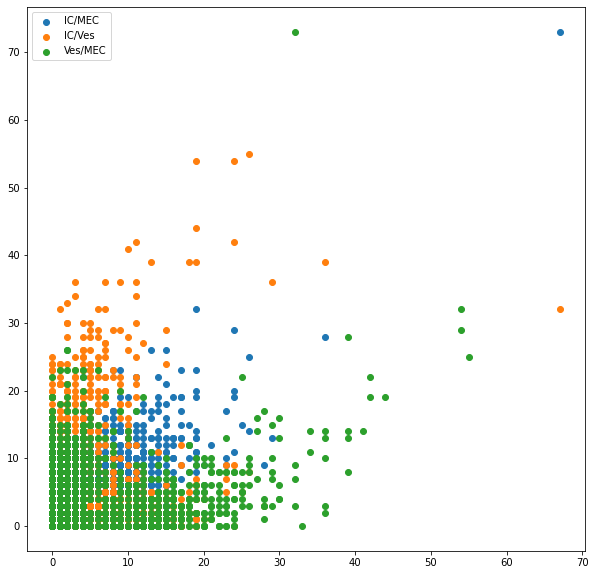

In [157]:
# calculating the correlation between sparce data populations to see if they need to be merged
plt.figure(figsize=(10,10))
plt.scatter(data["IC"],data["MEC"], label="IC/MEC")
data["IC"].corr(data["MEC"])
plt.scatter(data["IC"],data["Ves"], label="IC/Ves")
data["IC"].corr(data["Ves"])
plt.scatter(data["Ves"],data["MEC"], label="Ves/MEC")
data["Ves"].corr(data["MEC"])

plt.legend()